### Implement a simple deep neural network (DNN) for solving the polynomial y = 5x^3 − 8x^2 − 7x + 1 with the following specifications:

  a) Use three hidden-layers of sizes 32, 64, and 128 and display the generated DNN with the required number of parameters.

  b) Generate training samples within the range of -20 to +20. Use the appropriate method for normalizing the training data in the range of -1 to +1.

  c) Use 5% of the samples as test data and 5% of the samples as validation data and the rest of the data for training the DNN with and appropriate number of epochs.

  d) Display the training accuracy vs validation accuracy and training error vs validation error curves.

  e) After training, use the test data for prediction and display the prediction accuracy vs true levels of the test data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf

/Users/fahimahammedfiroz/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Creating the dataset

In [2]:
x = np.random.randint(-20, 20, 10000)
y = 5 * x ** 3 - 8 * x ** 2 - 7 * x + 1
print(x, y)

[  3  -1  -7 ...  17 -15  17] [    43     -5  -2057 ...  22135 -18569  22135]


Normalizing the data set in the range of -1 to +1

In [3]:
normX = (2 * (x - np.min(x)) / (np.max(x) - np.min(x))) - 1
normY = (2 * (y - np.min(y)) / (np.max(y) - np.min(y))) - 1

Splitting the dataset into training, validation, and test datasets

In [4]:
size = len(normX)

xTrainData = normX[:int(size * 0.9)]
xTestData = normX[int(size * 0.95):]
xValidationData = normX[int(size * 0.9): int(size * 0.95)]

yTrainData = normY[:int(size * 0.9)]
yTestData = normY[int(size * 0.95):]
yValidationData = normY[int(size * 0.9): int(size * 0.95)]

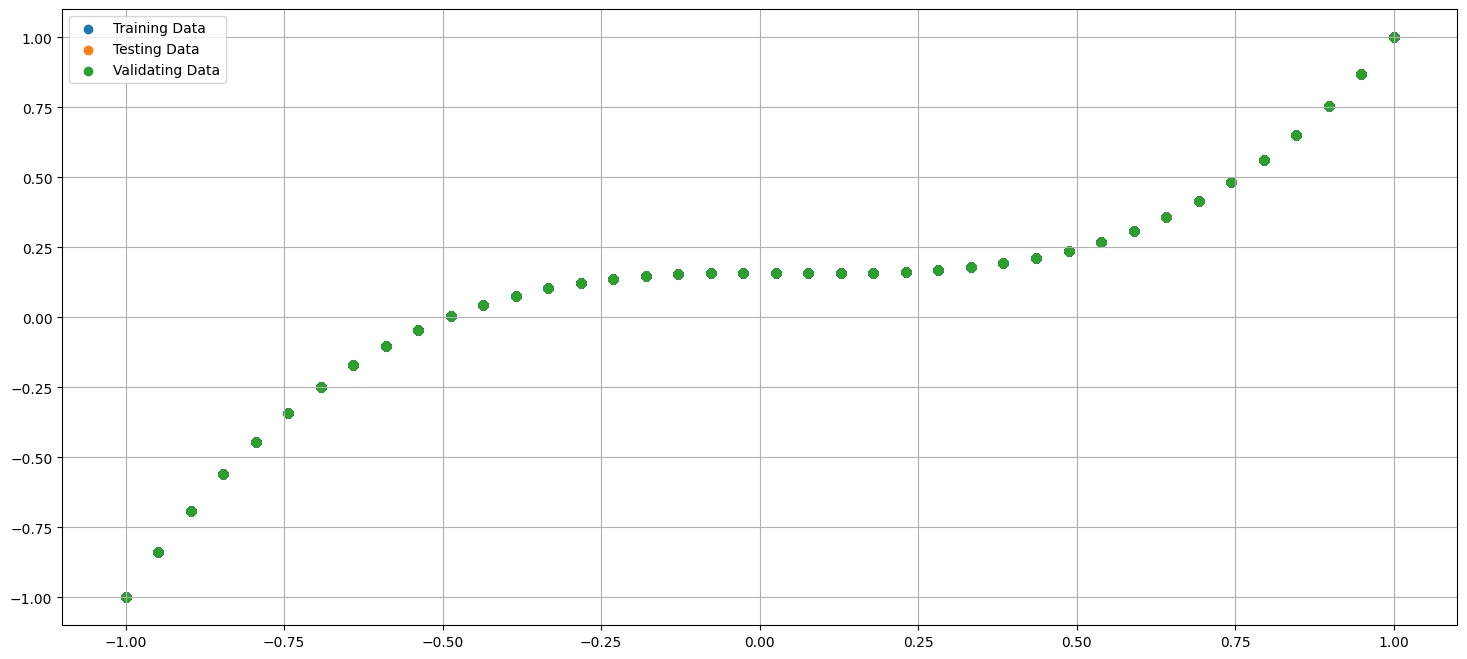

In [5]:
plt.figure(figsize = (18, 8))
plt.scatter(xTrainData, yTrainData, label = 'Training Data')
plt.scatter(xTestData, yTestData, label = 'Testing Data')
plt.scatter(xValidationData, yValidationData, label = 'Validating Data')
plt.legend()
plt.grid()
plt.show()

Building DNN Model


In [6]:
inputs = Input((1,))
hidden = Dense(32, activation = 'sigmoid')(inputs)
hidden = Dense(64, activation = 'sigmoid')(hidden)
hidden = Dense(18, activation = 'sigmoid')(hidden)
outputs = Dense(1, name= 'output_layer')(hidden)

model = Model(inputs, outputs, name = "DNN_MODEL")
model.summary()

Model: "DNN_MODEL"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 18)             │         1,170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            19 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,365 (13.14 KB)

 Trainable params: 3,365 (13.14 KB)

 Non-trainable params: 0 (0.00 B)

Train the DNN Model

In [7]:
model.compile(optimizer = 'adam', loss= 'mean_squared_error', metrics = [tf.keras.metrics.R2Score(name = 'accuracy')])
modelFit = model.fit(xTrainData, yTrainData, epochs= 50, validation_data=(xValidationData, yValidationData), verbose=0)
history = modelFit.history

In [8]:
# Evaluate the model on the training and validation datasets
trainLoss, trainAccuracy = model.evaluate(xTrainData, yTrainData, verbose=0)
validationLoss, validationAccuracy = model.evaluate(xValidationData, yValidationData, verbose=0)

print("Training Loss:", trainLoss)
print("Training Accuracy:", trainAccuracy)
print("Validation Loss:", validationLoss)
print("Validation Accuracy:", validationAccuracy)

Training Loss: 5.1636267016874626e-05
Training Accuracy: 0.999693751335144
Validation Loss: 4.678267578128725e-05
Validation Accuracy: 0.9997252821922302


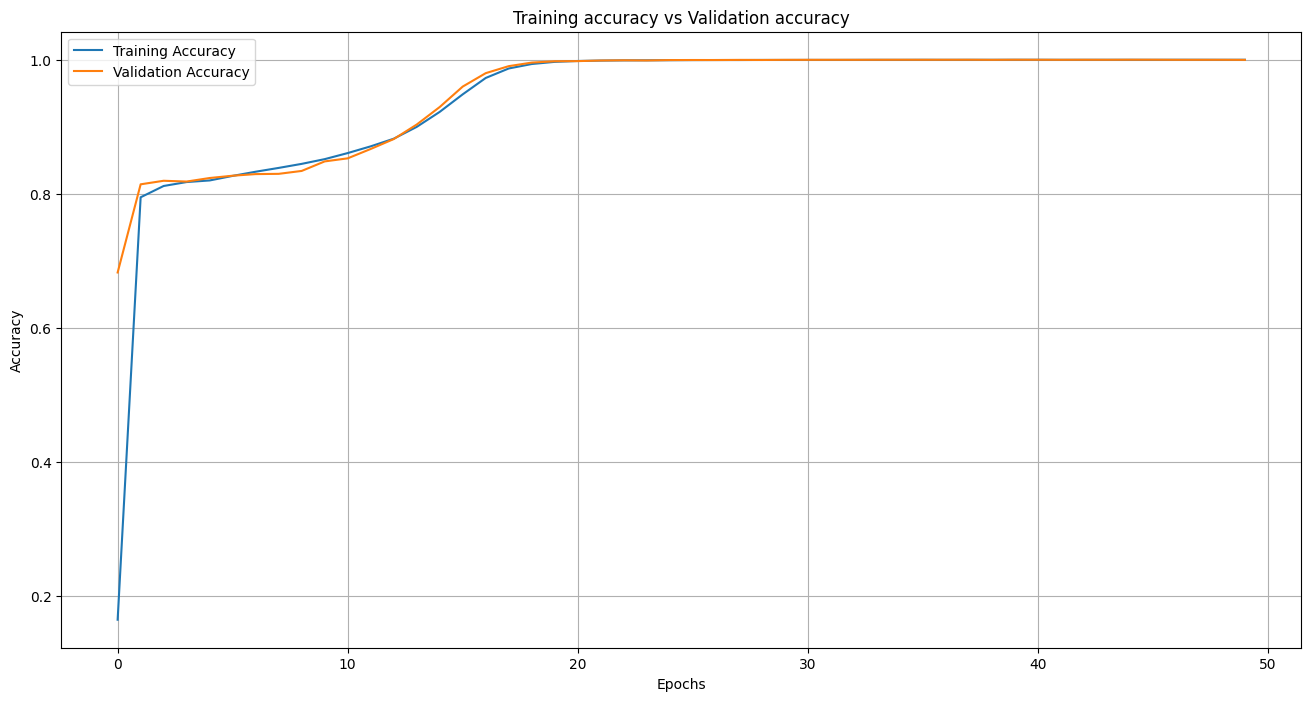

In [9]:
plt.figure(figsize = (16, 8))
plt.plot(history['accuracy'], label = 'Training Accuracy')
plt.plot(history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

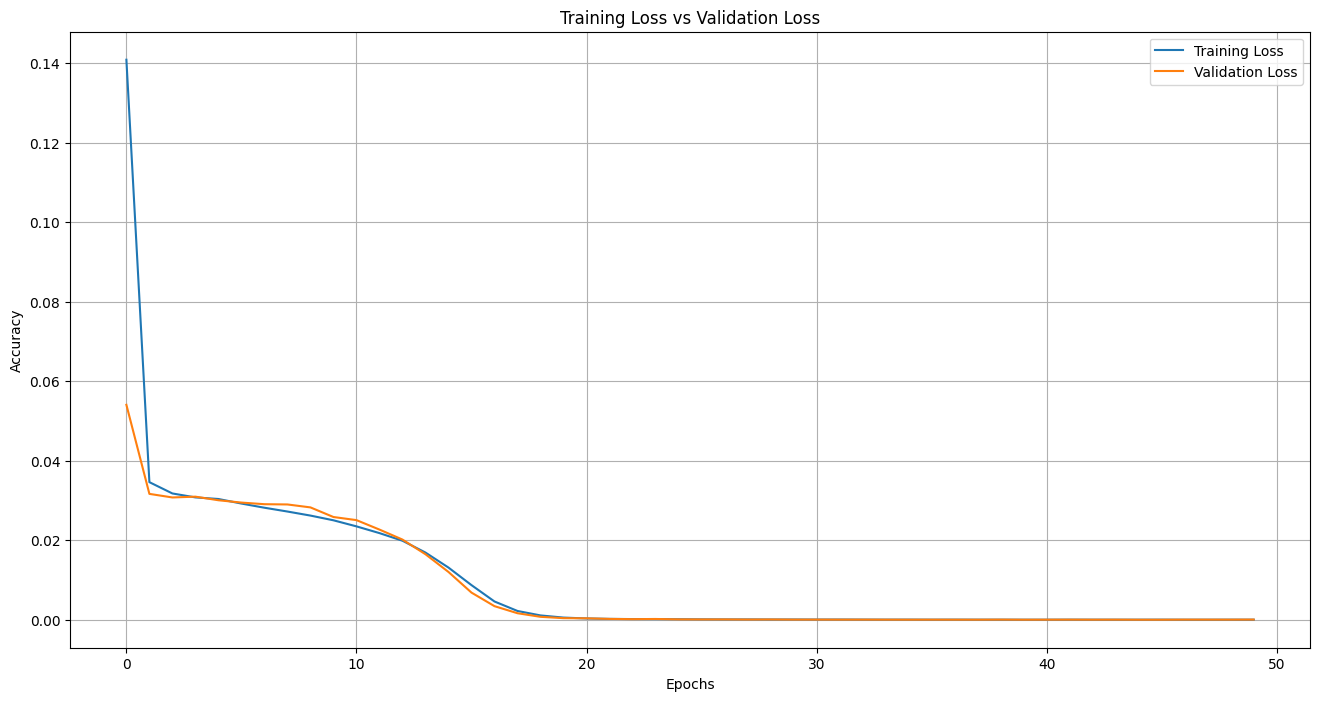

In [10]:
plt.figure(figsize = (16, 8))
plt.plot(history['loss'], label = 'Training Loss')
plt.plot(history['val_loss'], label = 'Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [11]:
print(xTestData.shape)

(500,)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


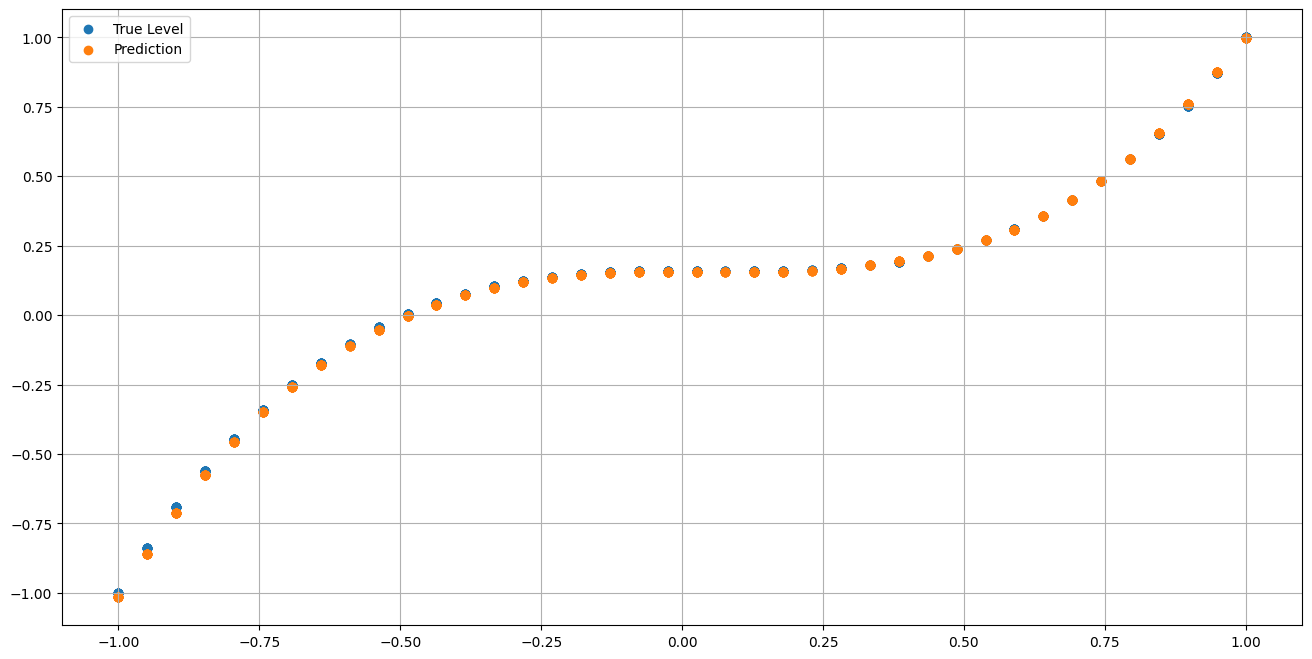

In [12]:
predictions = model.predict(xTestData)

plt.figure(figsize = (16, 8))
plt.scatter(xTestData, yTestData, label = 'True Level')
plt.scatter(xTestData, predictions, label = 'Prediction')
plt.legend()
plt.grid()
plt.show()